In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('application_data.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(307511, 122)

In [ ]:
df.nunique()

SK_ID_CURR                    307511
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        3
FLAG_OWN_CAR                       2
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_QRT         11
AMT_REQ_CREDIT_BUREAU_YEAR        25
Length: 122, dtype: int64

In [ ]:
# find bad columns (columns with more than 30% null values)

badcol=df.isnull().sum()
badcol=badcol[badcol.values>(0.3*len(badcol))]
len(badcol)

64

In [ ]:
# drop bad columns
badcol = list(badcol[badcol.values>=0.3].index)
df.drop(labels=badcol,axis=1,inplace=True)
print(len(badcol))

64


In [ ]:
# double check for bad columns
df.isnull().sum()/len(df)*100 > 0.3

SK_ID_CURR                     False
TARGET                         False
NAME_CONTRACT_TYPE             False
CODE_GENDER                    False
FLAG_OWN_CAR                   False
FLAG_OWN_REALTY                False
CNT_CHILDREN                   False
AMT_INCOME_TOTAL               False
AMT_CREDIT                     False
AMT_ANNUITY                    False
NAME_INCOME_TYPE               False
NAME_EDUCATION_TYPE            False
NAME_FAMILY_STATUS             False
NAME_HOUSING_TYPE              False
REGION_POPULATION_RELATIVE     False
DAYS_BIRTH                     False
DAYS_EMPLOYED                  False
DAYS_REGISTRATION              False
DAYS_ID_PUBLISH                False
FLAG_MOBIL                     False
FLAG_EMP_PHONE                 False
FLAG_WORK_PHONE                False
FLAG_CONT_MOBILE               False
FLAG_PHONE                     False
FLAG_EMAIL                     False
CNT_FAM_MEMBERS                False
REGION_RATING_CLIENT           False
R

In [ ]:
# check null value
df.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                    12
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
CNT_FAM_MEMBERS                 2
REGION_RATING_CLIENT            0
REGION_RATING_CLIENT_W_CITY     0
WEEKDAY_APPR_PROCESS_START      0
HOUR_APPR_PROC

In [ ]:
df.shape

(307511, 58)

In [ ]:
# drop all rows with null value
df.dropna(axis=0, how='any', inplace=True)

In [ ]:
df.shape

(307496, 58)

In [ ]:
# remove useless columns

no_columns =['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df.drop(labels=no_columns,axis=1,inplace=True)

In [ ]:
df.shape

(307496, 28)

In [ ]:
df.nunique()

SK_ID_CURR                     307496
TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER                         3
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
CNT_CHILDREN                       15
AMT_INCOME_TOTAL                 2548
AMT_CREDIT                       5603
AMT_ANNUITY                     13672
NAME_INCOME_TYPE                    8
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  5
NAME_HOUSING_TYPE                   6
REGION_POPULATION_RELATIVE         81
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_REGISTRATION               15688
DAYS_ID_PUBLISH                  6168
WEEKDAY_APPR_PROCESS_START          7
HOUR_APPR_PROCESS_START            24
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NO

In [ ]:
df['CODE_GENDER'].value_counts()

CODE_GENDER
F      202439
M      105053
XNA         4
Name: count, dtype: int64

In [ ]:
# Updating the column 'CODE_GENDER' with "F" for the dataset

df.loc[df['CODE_GENDER']=='XNA','CODE_GENDER']='F'
df['CODE_GENDER'].value_counts()

CODE_GENDER
F    202443
M    105053
Name: count, dtype: int64

In [ ]:
# Drop the rows have 'XNA' values in the organization type column

df=df.drop(df.loc[df['ORGANIZATION_TYPE']=='XNA'].index)
df[df['ORGANIZATION_TYPE']=='XNA'].shape

(0, 28)

In [ ]:
df.shape

(252122, 28)

In [ ]:
df.head(20)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-291,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-2531,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-3458,THURSDAY,11,0,0,0,0,1,1,Religion
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,-477,WEDNESDAY,16,0,0,0,0,0,0,Other
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,-619,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,-2379,MONDAY,16,0,0,0,0,1,1,Other
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,-3992,THURSDAY,8,0,0,0,0,0,0,Electricity
10,100014,0,Cash loans,F,N,Y,1,112500.0,652500.0,21177.0,...,-738,SATURDAY,15,0,0,0,0,0,0,Medicine


In [ ]:
df2 = pd.read_csv("previous_application.csv")
df2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
null_values=df2.isnull().sum()
null_values

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [ ]:
# identify data with more than 50% missing values
null_values1 = round(df2.isnull().sum()*100/len(df2),2)

null_values1_50 = null_values1[null_values1>50]
null_values1_50

AMT_DOWN_PAYMENT            53.64
RATE_DOWN_PAYMENT           53.64
RATE_INTEREST_PRIMARY       99.64
RATE_INTEREST_PRIVILEGED    99.64
dtype: float64

In [ ]:
# Removing these 4 columns
df2.drop(columns=null_values1_50.index, inplace=True)
df2.shape

(1670214, 33)

In [ ]:
# Droping down unnecessary columns
useless_col1=["WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START",
       "FLAG_LAST_APPL_PER_CONTRACT","NFLAG_LAST_APPL_IN_DAY"]
df2.drop(labels=useless_col1, axis=1,inplace=True)
df2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,-73,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,-164,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,-301,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,-512,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,-781,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
## Replacing null values with median in the column AMT_ANNUITY
amt_annuity_median=df2.AMT_ANNUITY.median()
df2.AMT_ANNUITY.fillna(amt_annuity_median,inplace= True)
df2.AMT_ANNUITY.isnull().sum()

0

In [ ]:
## Replacing null values with median in the column AMT_GOODS_PRICE
amt_goods_price_median=df2.AMT_ANNUITY.median()
df2.AMT_GOODS_PRICE.fillna(amt_goods_price_median,inplace= True)
df2.AMT_GOODS_PRICE.isnull().sum()

0

In [ ]:
df2.isnull().sum()

SK_ID_PREV                        0
SK_ID_CURR                        0
NAME_CONTRACT_TYPE                0
AMT_ANNUITY                       0
AMT_APPLICATION                   0
AMT_CREDIT                        1
AMT_GOODS_PRICE                   0
NAME_CASH_LOAN_PURPOSE            0
NAME_CONTRACT_STATUS              0
DAYS_DECISION                     0
NAME_PAYMENT_TYPE                 0
CODE_REJECT_REASON                0
NAME_TYPE_SUITE              820405
NAME_CLIENT_TYPE                  0
NAME_GOODS_CATEGORY               0
NAME_PORTFOLIO                    0
NAME_PRODUCT_TYPE                 0
CHANNEL_TYPE                      0
SELLERPLACE_AREA                  0
NAME_SELLER_INDUSTRY              0
CNT_PAYMENT                  372230
NAME_YIELD_GROUP                  0
PRODUCT_COMBINATION             346
DAYS_FIRST_DRAWING           673065
DAYS_FIRST_DUE               673065
DAYS_LAST_DUE_1ST_VERSION    673065
DAYS_LAST_DUE                673065
DAYS_TERMINATION            

In [ ]:
days_installments=["DAYS_FIRST_DRAWING","DAYS_FIRST_DUE","DAYS_LAST_DUE_1ST_VERSION","DAYS_LAST_DUE","DAYS_TERMINATION"]

df2.fillna(df2[days_installments].median(),inplace=True)
df2.isnull().sum()

SK_ID_PREV                        0
SK_ID_CURR                        0
NAME_CONTRACT_TYPE                0
AMT_ANNUITY                       0
AMT_APPLICATION                   0
AMT_CREDIT                        1
AMT_GOODS_PRICE                   0
NAME_CASH_LOAN_PURPOSE            0
NAME_CONTRACT_STATUS              0
DAYS_DECISION                     0
NAME_PAYMENT_TYPE                 0
CODE_REJECT_REASON                0
NAME_TYPE_SUITE              820405
NAME_CLIENT_TYPE                  0
NAME_GOODS_CATEGORY               0
NAME_PORTFOLIO                    0
NAME_PRODUCT_TYPE                 0
CHANNEL_TYPE                      0
SELLERPLACE_AREA                  0
NAME_SELLER_INDUSTRY              0
CNT_PAYMENT                  372230
NAME_YIELD_GROUP                  0
PRODUCT_COMBINATION             346
DAYS_FIRST_DRAWING                0
DAYS_FIRST_DUE                    0
DAYS_LAST_DUE_1ST_VERSION         0
DAYS_LAST_DUE                     0
DAYS_TERMINATION            

In [ ]:
df2.NFLAG_INSURED_ON_APPROVAL.fillna(0,inplace=True)
df2.isnull().sum()

SK_ID_PREV                        0
SK_ID_CURR                        0
NAME_CONTRACT_TYPE                0
AMT_ANNUITY                       0
AMT_APPLICATION                   0
AMT_CREDIT                        1
AMT_GOODS_PRICE                   0
NAME_CASH_LOAN_PURPOSE            0
NAME_CONTRACT_STATUS              0
DAYS_DECISION                     0
NAME_PAYMENT_TYPE                 0
CODE_REJECT_REASON                0
NAME_TYPE_SUITE              820405
NAME_CLIENT_TYPE                  0
NAME_GOODS_CATEGORY               0
NAME_PORTFOLIO                    0
NAME_PRODUCT_TYPE                 0
CHANNEL_TYPE                      0
SELLERPLACE_AREA                  0
NAME_SELLER_INDUSTRY              0
CNT_PAYMENT                  372230
NAME_YIELD_GROUP                  0
PRODUCT_COMBINATION             346
DAYS_FIRST_DRAWING                0
DAYS_FIRST_DUE                    0
DAYS_LAST_DUE_1ST_VERSION         0
DAYS_LAST_DUE                     0
DAYS_TERMINATION            

In [ ]:
df2.shape

(1670214, 29)

In [ ]:
df2.dropna(inplace=True)
df2.shape

(839447, 29)

In [ ]:
df2=df2.drop(df2[df2['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df2=df2.drop(df2[df2['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df2=df2.drop(df2[df2['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

df2.shape

(42224, 29)

In [ ]:
df2

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,315000.0,Everyday expenses,Approved,-684,...,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
85,1981960,306707,Cash loans,10678.005,225000.0,269550.0,225000.0,Building a house or an annex,Refused,-13,...,XNA,36.0,low_normal,Cash Street: low,365243.0,-831.0,-361.0,-537.0,-499.0,0.0
222,1876485,354388,Cash loans,40565.790,976500.0,1061572.5,976500.0,Repairs,Refused,-210,...,XNA,36.0,low_normal,Cash Street: low,365243.0,-831.0,-361.0,-537.0,-499.0,0.0
312,2793811,139978,Cash loans,11330.280,229500.0,302206.5,229500.0,Repairs,Refused,-33,...,XNA,36.0,low_action,Cash Street: low,365243.0,-831.0,-361.0,-537.0,-499.0,0.0
338,2627285,219469,Cash loans,23567.850,229500.0,241920.0,229500.0,Journey,Approved,-920,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-890.0,-560.0,-650.0,-631.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670023,2410386,242904,Cash loans,62568.000,1800000.0,1800000.0,1800000.0,Buying a new car,Canceled,-51,...,XNA,48.0,low_normal,Cash X-Sell: low,365243.0,-831.0,-361.0,-537.0,-499.0,0.0
1670028,1433422,299582,Cash loans,64243.395,1125000.0,1206675.0,1125000.0,Buying a new car,Canceled,-483,...,XNA,30.0,middle,Cash Street: middle,365243.0,-831.0,-361.0,-537.0,-499.0,0.0
1670167,2814608,283326,Cash loans,46381.275,1507500.0,1686591.0,1507500.0,Buying a holiday home / land,Canceled,-304,...,XNA,60.0,low_normal,Cash Street: low,365243.0,-831.0,-361.0,-537.0,-499.0,0.0
1670189,2406354,377114,Cash loans,26240.715,796500.0,954207.0,796500.0,Building a house or an annex,Canceled,-72,...,XNA,60.0,low_normal,Cash Street: low,365243.0,-831.0,-361.0,-537.0,-499.0,0.0


In [ ]:
df2.shape

(42224, 29)

In [ ]:
# Now merging the Application dataset with previous appliaction dataset

new_df=pd.merge(left=df,right=df2,how='inner',on='SK_ID_CURR')

In [ ]:
# Renaming the column names after merging

new_df1 = new_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [ ]:
new_df1.shape

(30733, 56)

In [ ]:
new_df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,...,XNA,60.0,low_action,Cash Street: low,365243.0,-831.0,-361.0,-537.0,-499.0,0.0
1,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,...,XNA,42.0,low_normal,Cash Street: low,365243.0,-665.0,565.0,-455.0,-446.0,1.0
2,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,XNA,18.0,low_normal,Cash Street: low,365243.0,-509.0,1.0,365243.0,365243.0,1.0
3,100077,0,Cash loans,M,N,Y,0,180000.0,1256400.0,40657.5,...,XNA,60.0,low_normal,Cash Street: low,365243.0,-831.0,-361.0,-537.0,-499.0,0.0
4,100080,0,Revolving loans,F,N,N,1,157500.0,450000.0,22500.0,...,XNA,12.0,high,Cash Street: high,365243.0,-1682.0,-1352.0,-1352.0,-1344.0,0.0


In [ ]:
column_names = new_df1.columns.tolist()

print(column_names)

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE_y', 'AMT_ANNUITY_y', 'AMT_APPLICATION', 'AMT_CREDIT_y', 'AMT_GOODS_PRICE', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'N

In [ ]:
features = new_df1.drop('TARGET', axis=1).columns.tolist()
print(features)

target = 'TARGET'

['SK_ID_CURR', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE_y', 'AMT_ANNUITY_y', 'AMT_APPLICATION', 'AMT_CREDIT_y', 'AMT_GOODS_PRICE', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_

In [ ]:
data_types = new_df1.dtypes

print(data_types)

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE_x            object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT_x                   float64
AMT_ANNUITY_x                  float64
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
REG_REGION_NOT_LIVE_REGION       int64
REG_REGION_NOT_WORK_REGION       int64
LIVE_REGION_NOT_WORK_REGION      int64
REG_CITY_NOT_LIVE_CITY           int64
REG_CITY_NOT_WORK_CITY   

In [ ]:
numerical_cols = new_df1.select_dtypes(include=['int64', 'float64']).columns.tolist()
descriptive_cols = new_df1.select_dtypes(include=['object']).columns.tolist()

print("Numerical columns:", numerical_cols)
print("Descriptive columns:", descriptive_cols)

Numerical columns: ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'SK_ID_PREV', 'AMT_ANNUITY_y', 'AMT_APPLICATION', 'AMT_CREDIT_y', 'AMT_GOODS_PRICE', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']
Descriptive columns: ['NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'NAME_CONTRACT_TYPE_y', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYM

In [ ]:
# Splitting the dataset into female and male
df_female = df[df['CODE_GENDER'] == 'F']
df_male = df[df['CODE_GENDER'] == 'M']

In [ ]:
df_repair = new_df1[new_df1['NAME_CASH_LOAN_PURPOSE'] == 'Repairs']

In [ ]:
df_repair.shape

(10697, 56)

In [ ]:
df_repair.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
2,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,XNA,18.0,low_normal,Cash Street: low,365243.0,-509.0,1.0,365243.0,365243.0,1.0
3,100077,0,Cash loans,M,N,Y,0,180000.0,1256400.0,40657.5,...,XNA,60.0,low_normal,Cash Street: low,365243.0,-831.0,-361.0,-537.0,-499.0,0.0
6,100089,0,Cash loans,M,N,Y,0,135000.0,337761.0,15781.5,...,XNA,48.0,low_action,Cash Street: low,365243.0,-831.0,-361.0,-537.0,-499.0,0.0
7,100098,0,Revolving loans,M,Y,N,0,225000.0,270000.0,13500.0,...,XNA,18.0,high,Cash Street: high,365243.0,-587.0,-77.0,-137.0,-129.0,1.0
9,100122,0,Cash loans,F,N,N,1,76500.0,808650.0,26217.0,...,XNA,60.0,low_action,Cash Street: low,365243.0,-831.0,-361.0,-537.0,-499.0,0.0


## Repair Loan Type Analyzation

In [ ]:
application_counts = df_repair[target].value_counts()

approval_percentage = application_counts[1] / application_counts.sum() * 100
rejection_percentage = application_counts[0] / application_counts.sum() * 100

print(f"Percentage of Approvals: {approval_percentage:.2f}%")
print(f"Percentage of Rejections: {rejection_percentage:.2f}%")

Percentage of Approvals: 12.15%
Percentage of Rejections: 87.85%


In [ ]:
approved_raw = df_repair[df_repair[target] == 1]
rejected_raw = df_repair[df_repair[target] == 0]

percentage = len(approved_raw) / float(len(rejected_raw))

rejected = rejected_raw.sample(frac=percentage, random_state=1)

df_repair2 = approved_raw._append(rejected)

application_counts = df_repair2[target].value_counts()
approval_percentage = application_counts[0] / application_counts.sum() * 100
rejection_percentage = application_counts[1] / application_counts.sum() * 100

print(f"Percentage of Approvals: {approval_percentage:.2f}%")
print(f"Percentage of Rejections: {rejection_percentage:.2f}%")

Percentage of Approvals: 50.00%
Percentage of Rejections: 50.00%


In [ ]:
df_repair2.shape

(2600, 56)

In [ ]:
unique_values = df_repair2[descriptive_cols].nunique()

print(unique_values)

NAME_CONTRACT_TYPE_x           2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_INCOME_TYPE               3
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             52
NAME_CONTRACT_TYPE_y           1
NAME_CASH_LOAN_PURPOSE         1
NAME_CONTRACT_STATUS           3
NAME_PAYMENT_TYPE              3
CODE_REJECT_REASON             7
NAME_TYPE_SUITE                7
NAME_CLIENT_TYPE               4
NAME_GOODS_CATEGORY            1
NAME_PORTFOLIO                 1
NAME_PRODUCT_TYPE              2
CHANNEL_TYPE                   7
NAME_SELLER_INDUSTRY           5
NAME_YIELD_GROUP               4
PRODUCT_COMBINATION            6
dtype: int64


In [ ]:
df_repair3 = pd.get_dummies(df_repair2)
df_repair2.shape

(2600, 170)

In [ ]:
from sklearn.model_selection import train_test_split
train_validate, test = train_test_split(df_repair3, test_size=0.1, random_state=0)

train, validate = train_test_split(train_validate, test_size=0.2, random_state=0)

print(f"Number of instances in the training set: {len(train)}")
print(f"Number of instances in the validation set: {len(validate)}")
print(f"Number of instances in the test set: {len(test)}")


Number of instances in the training set: 1872
Number of instances in the validation set: 468
Number of instances in the test set: 260


In [ ]:
features = df_repair3.drop(target, axis=1).columns.tolist()
print(features)

target = 'TARGET'

['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'SK_ID_PREV', 'AMT_ANNUITY_y', 'AMT_APPLICATION', 'AMT_CREDIT_y', 'AMT_GOODS_PRICE', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL', 'NAME_CONTRACT_TYPE_x_Cash loans', 'NAME_CONTRACT_TYPE_x_Revolving loans', 'CODE_GENDER_F', 'CODE_GENDER_M', 'FLAG_OWN_CAR_N', 'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_N', 'FLAG_OWN_REALTY_Y', 'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Academic degree', 'NAME_EDUCATION_T

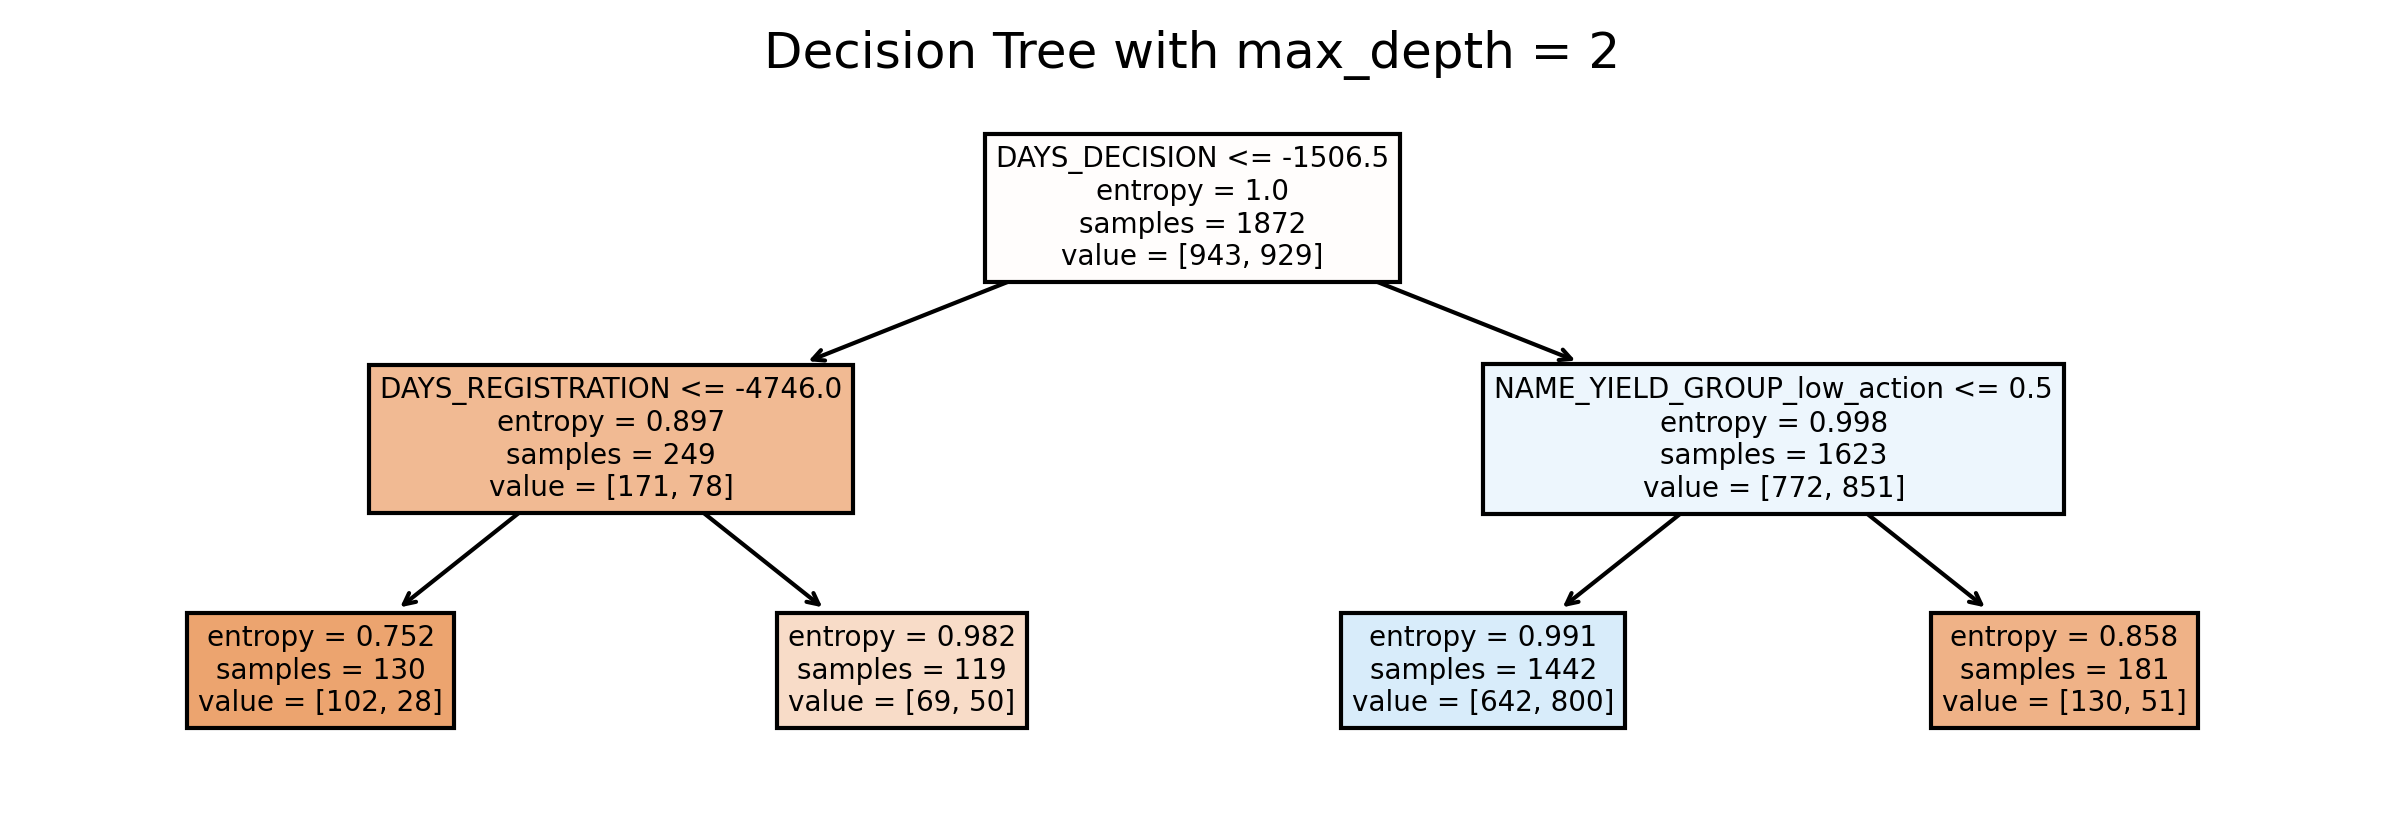

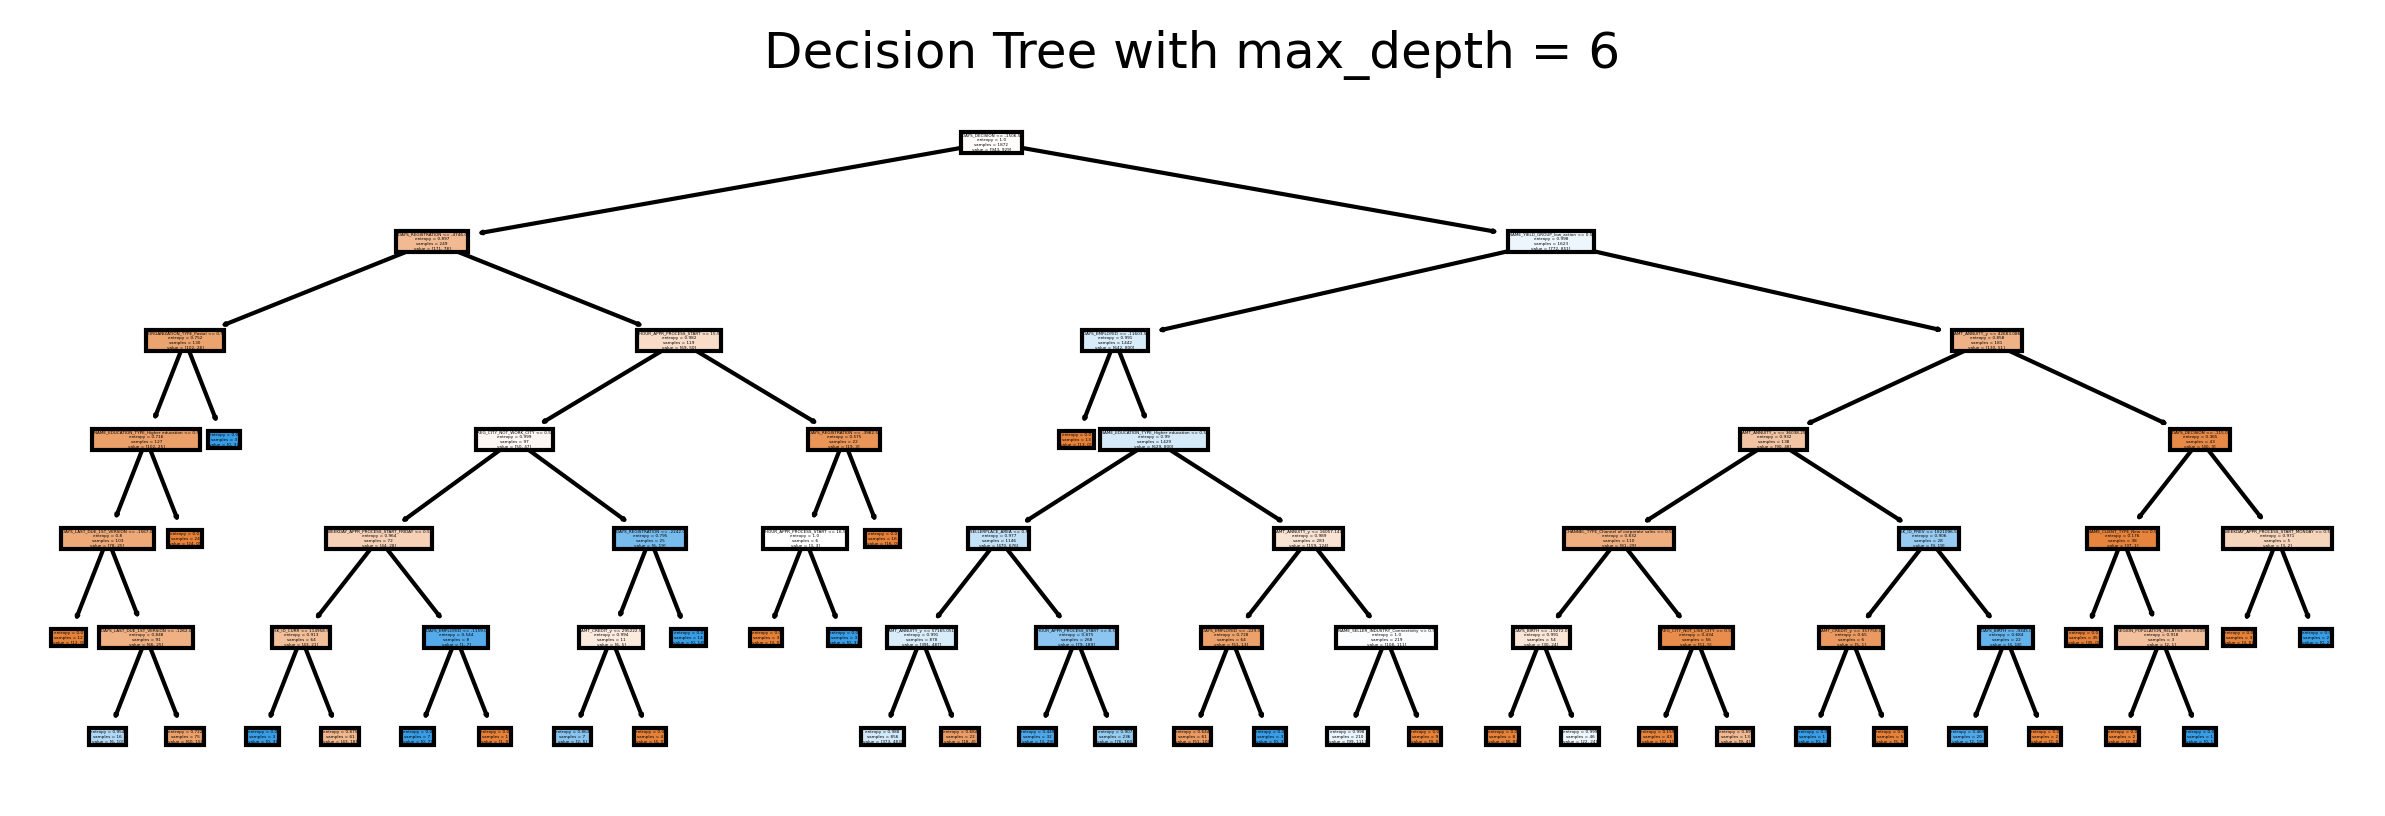

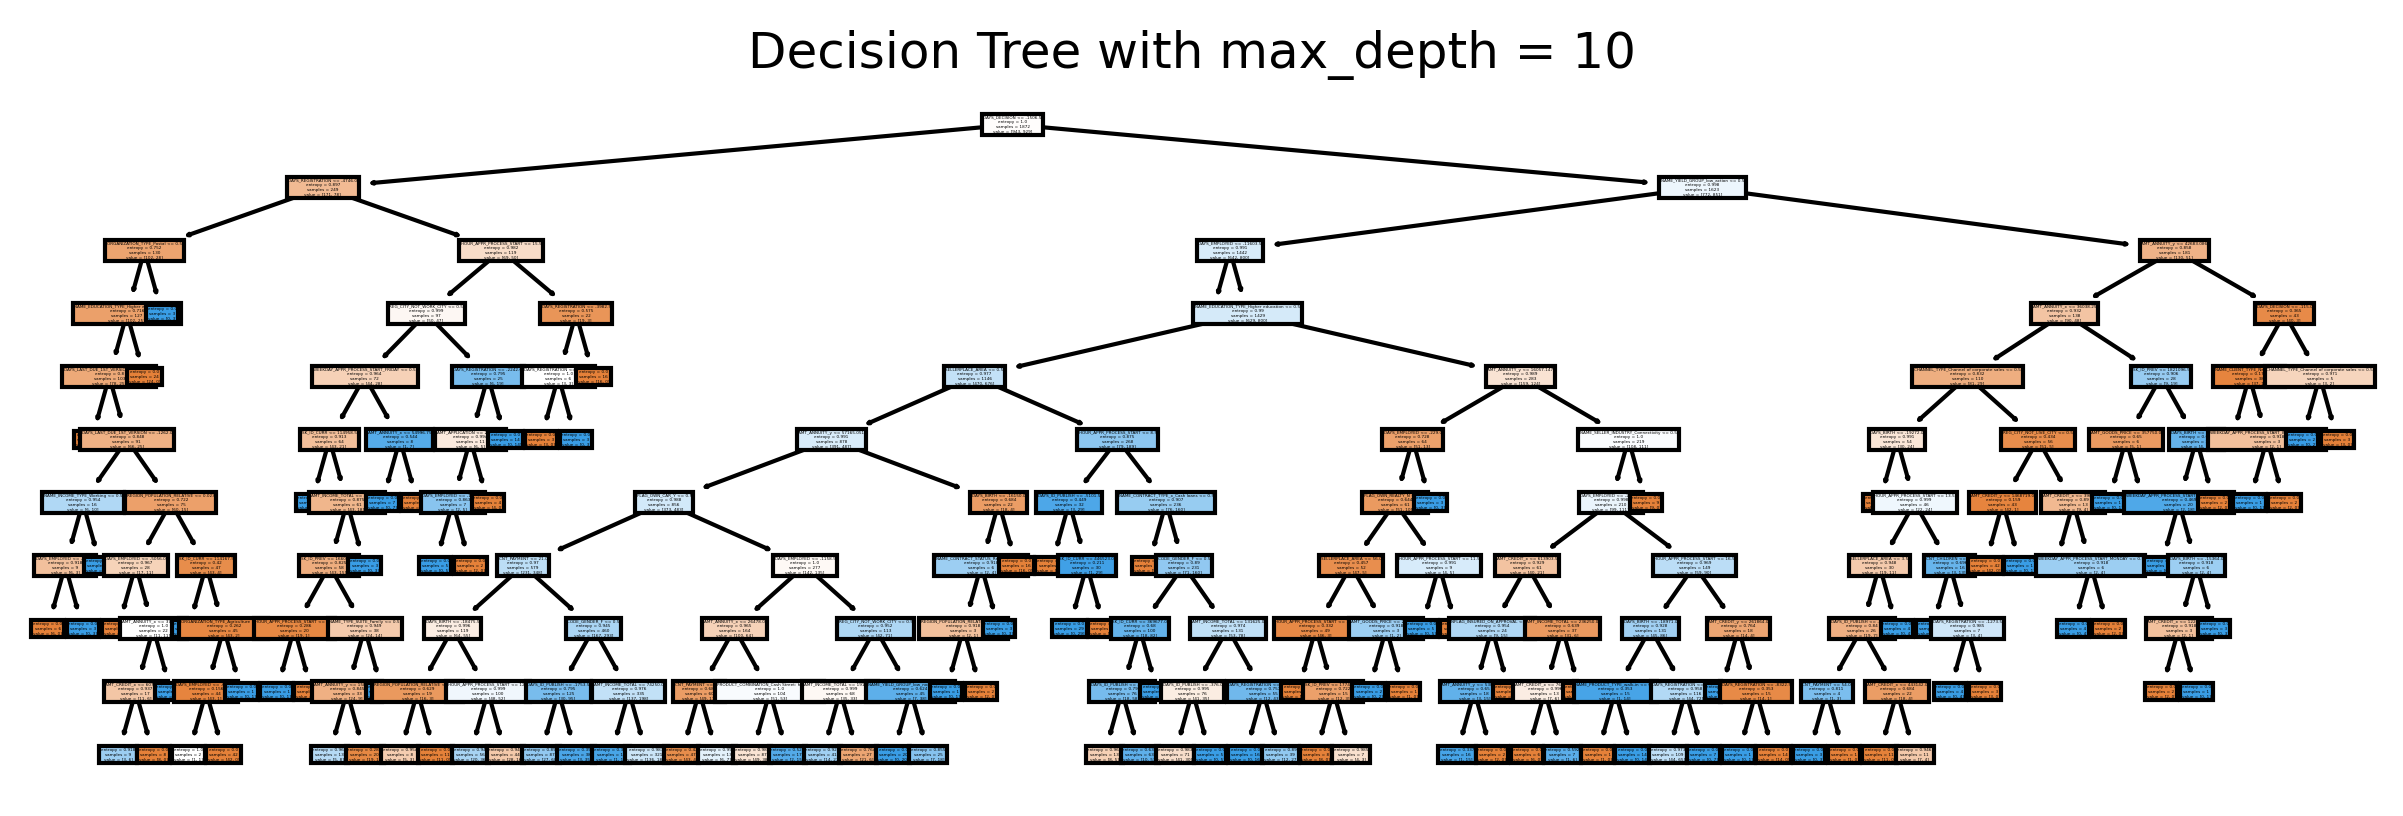

Accuracy of Decision Tree Classifier with max_depth = 2: 0.5620
Accuracy of Decision Tree Classifier with max_depth = 6: 0.5620
Accuracy of Decision Tree Classifier with max_depth = 10: 0.5705


In [ ]:
# Build a Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

features = train.drop(target, axis=1).columns.tolist()
X_train = train[features]
y_train = train[target]
X_validate = validate[features]
y_validate = validate[target]
X_test = test[features]
y_test = test[target]

depths = [2, 6, 10]
models = []
for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth, criterion='entropy')
    tree.fit(X_train, y_train)

    plt.figure(figsize=(10, 3), dpi=300)
    tree_dot = plot_tree(tree, feature_names=features, filled=True)
    plt.title(f"Decision Tree with max_depth = {depth}")
    plt.show()

    models.append(tree)

accuracies = []
for model in models:
    predictions = model.predict(X_validate)
    accuracy = accuracy_score(y_validate, predictions)
    accuracies.append(accuracy)

for depth, accuracy in zip(depths, accuracies):
    print(f"Accuracy of Decision Tree Classifier with max_depth = {depth}: {accuracy:.4f}")

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

# Assuming the best model is the one with the highest accuracy
best_model_index = accuracies.index(max(accuracies))
best_model = models[best_model_index]

# Predict the labels for the test set
y_pred = best_model.predict(X_test)

# Calculate precision, recall, F1 score, and ROC AUC
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

Precision: 0.6380368098159509
Recall: 0.7428571428571429
F1 Score: 0.6864686468646866
ROC AUC: 0.6255952380952381


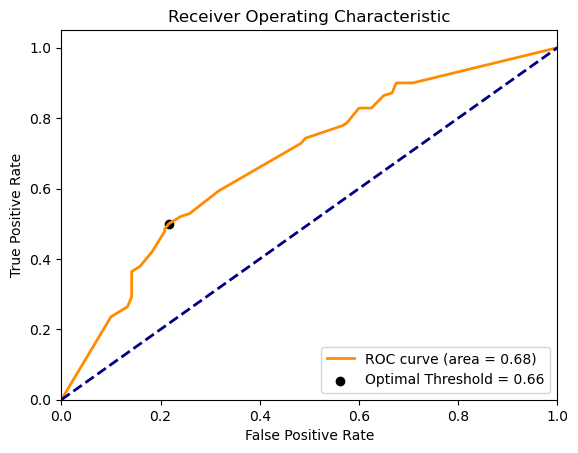

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_proba = best_model.predict_proba(X_test)[::,1]


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='black', label='Optimal Threshold = %0.2f' % optimal_threshold)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#SVM Classifier

import numpy as np
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt

scaled_svc = make_pipeline(StandardScaler(), SVC(probability=True))

param_grid = {'svc__C': np.logspace(-2, 2, 3), 'svc__gamma': np.logspace(-2, 2, 3) / X_train.shape[0]}

grids = GridSearchCV(scaled_svc, param_grid=param_grid, cv=5, return_train_score=True)
grids.fit(X_train, y_train)

print(f"Best Hyperparameters: {grids.best_params_}")

accuracy = grids.score(X_test, y_test)
print(f"Test Accuracy of Best Model: {accuracy:.4f}")

from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = grids.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")



Best Hyperparameters: {'svc__C': 100.0, 'svc__gamma': 0.0005341880341880342}
Test Accuracy of Best Model: 0.6115
Precision: 0.6511627906976745
Recall: 0.6
F1 Score: 0.6245353159851301
ROC AUC: 0.6125


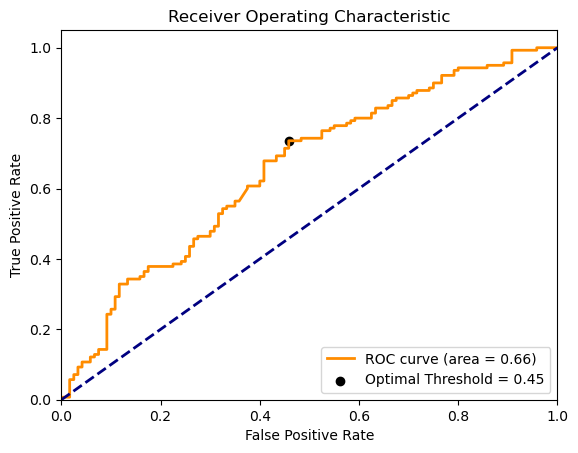

In [ ]:
from sklearn.metrics import roc_curve, auc
import numpy as np

grids.fit(X_train, y_train)

y_pred_proba = grids.predict_proba(X_test)[::,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='black', label='Optimal Threshold = %0.2f' % optimal_threshold)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

param_grid = {'max_features': [2, 4, 6, 8, 10], 'max_depth': [6, 8, 10, 12, 14]}

rf = RandomForestClassifier()

gridf = GridSearchCV(rf, param_grid=param_grid, cv=5, return_train_score=True)
gridf.fit(X_train, y_train)

print(f"Best Hyperparameters: {gridf.best_params_}")

accuracy = gridf.score(X_test, y_test)
print(f"Test Accuracy of Best Model: {accuracy:.4f}")

y_pred = gridf.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")



Best Hyperparameters: {'max_depth': 12, 'max_features': 10}
Test Accuracy of Best Model: 0.6885
Precision: 0.7153284671532847
Recall: 0.7
F1 Score: 0.7075812274368231
ROC AUC: 0.6875


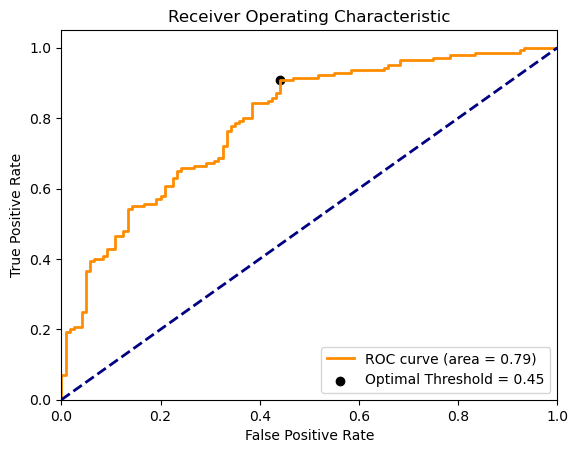

In [ ]:
from sklearn.metrics import roc_curve, auc
import numpy as np

y_pred_proba = gridf.predict_proba(X_test)[::,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='black', label='Optimal Threshold = %0.2f' % optimal_threshold)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Gradient Booster Classifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

param_grid = {'learning_rate': np.logspace(-2, 0, 3),
              'n_estimators': [50, 100, 200]}

gbrt = GradientBoostingClassifier(max_depth=6)

gridg = GridSearchCV(gbrt, param_grid=param_grid, cv=5, return_train_score=True)
gridg.fit(X_train, y_train)

print(f"Best Hyperparameters: {gridg.best_params_}")

accuracy = gridg.score(X_test, y_test)
print(f"Test Accuracy of Best Model: {accuracy:.4f}")

y_pred = gridg.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 200}
Test Accuracy of Best Model: 0.6654
Precision: 0.6962962962962963
Recall: 0.6714285714285714
F1 Score: 0.6836363636363636
ROC AUC: 0.6648809523809524


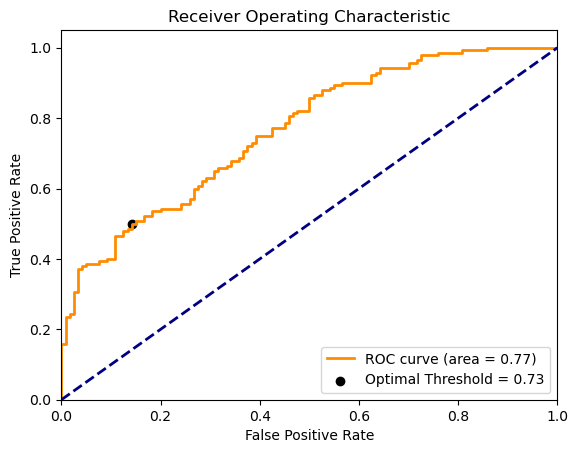

In [ ]:
y_pred_proba = gridg.predict_proba(X_test)[::,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='black', label='Optimal Threshold = %0.2f' % optimal_threshold)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(tree_method='gpu_hist')
xgb.fit(X_train, y_train)
train_accuracy = xgb.score(X_train, y_train)
test_accuracy = xgb.score(X_test, y_test)
print(f"XGBoost - Accuracy on test set: {test_accuracy:.4f}")

y_pred = xgb.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

C:\Users\Carina\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:160: UserWarning: [21:35:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy on test set: 0.6654
Precision: 0.6992481203007519
Recall: 0.6642857142857143
F1 Score: 0.6813186813186813
ROC AUC: 0.6654761904761906


C:\Users\Carina\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:160: UserWarning: [21:35:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Carina\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:160: UserWarning: [21:35:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the

In [ ]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


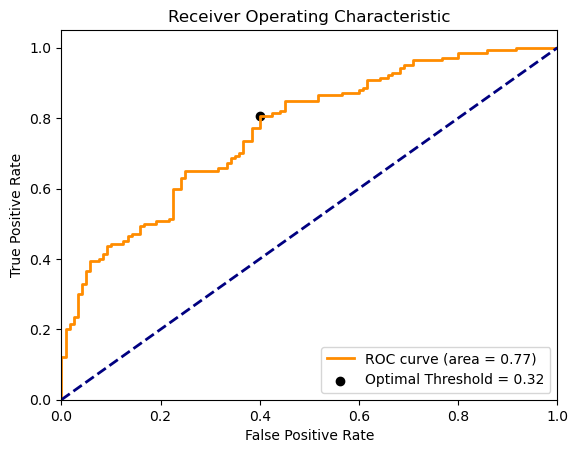

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_proba = xgb.predict_proba(X_test)[::,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='black', label='Optimal Threshold = %0.2f' % optimal_threshold)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Create a function to clean column names
import re
def clean_feature_names(feature_names):
    pattern = re.compile(r'[^a-zA-Z0-9\_]')
    return [pattern.sub('_', feature) for feature in feature_names]

# Clean the column names
X_train2 = X_train
X_train2.columns = clean_feature_names(X_train2.columns.tolist())
X_test2 = X_test
X_test2.columns = clean_feature_names(X_test2.columns.tolist())

In [ ]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(X_train2, y_train)
train_accuracy = lgbm.score(X_train2, y_train)
test_accuracy = lgbm.score(X_test2, y_test)
print(f"LightGBM - Accuracy on test set: {test_accuracy:.4f}")

y_pred = lgbm.predict(X_test2)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

[LightGBM] [Info] Number of positive: 929, number of negative: 943
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000637 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4250
[LightGBM] [Info] Number of data points in the train set: 1872, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496261 -> initscore=-0.014958
[LightGBM] [Info] Start training from score -0.014958
LightGBM - Accuracy on test set: 0.7000
Precision: 0.7279411764705882
Recall: 0.7071428571428572
F1 Score: 0.7173913043478262
ROC AUC: 0.699404761904762


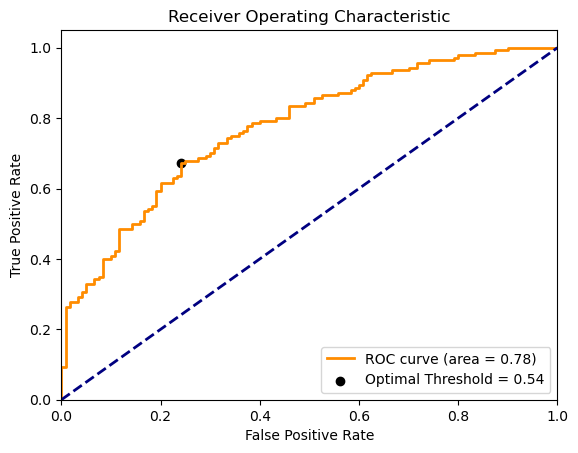

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_proba = lgbm.predict_proba(X_test)[::,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='black', label='Optimal Threshold = %0.2f' % optimal_threshold)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
pip install catboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from catboost import CatBoostClassifier

catb = CatBoostClassifier(task_type='GPU')
catb.fit(X_train, y_train)
train_accuracy = catb.score(X_train, y_train)
test_accuracy = catb.score(X_test, y_test)
print(f"CatBoost - Accuracy on test set: {test_accuracy:.4f}")

y_pred = catb.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")


Learning rate set to 0.032568
0:	learn: 0.6903494	total: 46.3ms	remaining: 46.3s
1:	learn: 0.6868998	total: 80.2ms	remaining: 40s
2:	learn: 0.6839795	total: 114ms	remaining: 37.8s
3:	learn: 0.6810222	total: 147ms	remaining: 36.6s
4:	learn: 0.6792627	total: 183ms	remaining: 36.5s
5:	learn: 0.6768657	total: 216ms	remaining: 35.7s
6:	learn: 0.6740192	total: 247ms	remaining: 35.1s
7:	learn: 0.6714480	total: 282ms	remaining: 34.9s
8:	learn: 0.6685548	total: 314ms	remaining: 34.6s
9:	learn: 0.6664268	total: 346ms	remaining: 34.2s
10:	learn: 0.6645253	total: 377ms	remaining: 33.9s
11:	learn: 0.6626575	total: 408ms	remaining: 33.6s
12:	learn: 0.6608557	total: 441ms	remaining: 33.5s
13:	learn: 0.6590615	total: 473ms	remaining: 33.3s
14:	learn: 0.6577056	total: 504ms	remaining: 33.1s
15:	learn: 0.6557465	total: 536ms	remaining: 32.9s
16:	learn: 0.6542987	total: 566ms	remaining: 32.7s
17:	learn: 0.6526536	total: 596ms	remaining: 32.5s
18:	learn: 0.6500628	total: 625ms	remaining: 32.3s
19:	learn: 

161:	learn: 0.4952019	total: 4.91s	remaining: 25.4s
162:	learn: 0.4946229	total: 4.93s	remaining: 25.3s
163:	learn: 0.4935928	total: 4.97s	remaining: 25.3s
164:	learn: 0.4926298	total: 5s	remaining: 25.3s
165:	learn: 0.4920772	total: 5.03s	remaining: 25.3s
166:	learn: 0.4917490	total: 5.06s	remaining: 25.2s
167:	learn: 0.4909283	total: 5.08s	remaining: 25.2s
168:	learn: 0.4903085	total: 5.11s	remaining: 25.1s
169:	learn: 0.4897182	total: 5.14s	remaining: 25.1s
170:	learn: 0.4892326	total: 5.17s	remaining: 25.1s
171:	learn: 0.4884513	total: 5.2s	remaining: 25s
172:	learn: 0.4880723	total: 5.23s	remaining: 25s
173:	learn: 0.4878405	total: 5.26s	remaining: 25s
174:	learn: 0.4874054	total: 5.29s	remaining: 24.9s
175:	learn: 0.4863811	total: 5.32s	remaining: 24.9s
176:	learn: 0.4858003	total: 5.35s	remaining: 24.9s
177:	learn: 0.4849272	total: 5.38s	remaining: 24.9s
178:	learn: 0.4848448	total: 5.41s	remaining: 24.8s
179:	learn: 0.4833173	total: 5.44s	remaining: 24.8s
180:	learn: 0.4824930	

321:	learn: 0.4023736	total: 9.56s	remaining: 20.1s
322:	learn: 0.4018941	total: 9.59s	remaining: 20.1s
323:	learn: 0.4012961	total: 9.62s	remaining: 20.1s
324:	learn: 0.4008827	total: 9.65s	remaining: 20s
325:	learn: 0.4006658	total: 9.68s	remaining: 20s
326:	learn: 0.4002157	total: 9.7s	remaining: 20s
327:	learn: 0.3998922	total: 9.73s	remaining: 19.9s
328:	learn: 0.3994725	total: 9.76s	remaining: 19.9s
329:	learn: 0.3991442	total: 9.78s	remaining: 19.9s
330:	learn: 0.3989826	total: 9.81s	remaining: 19.8s
331:	learn: 0.3983443	total: 9.84s	remaining: 19.8s
332:	learn: 0.3976027	total: 9.87s	remaining: 19.8s
333:	learn: 0.3968718	total: 9.9s	remaining: 19.8s
334:	learn: 0.3966280	total: 9.93s	remaining: 19.7s
335:	learn: 0.3957821	total: 9.96s	remaining: 19.7s
336:	learn: 0.3954644	total: 9.99s	remaining: 19.7s
337:	learn: 0.3950313	total: 10s	remaining: 19.6s
338:	learn: 0.3946538	total: 10s	remaining: 19.6s
339:	learn: 0.3938997	total: 10.1s	remaining: 19.6s
340:	learn: 0.3935459	to

483:	learn: 0.3366079	total: 14.3s	remaining: 15.2s
484:	learn: 0.3365064	total: 14.3s	remaining: 15.2s
485:	learn: 0.3362347	total: 14.3s	remaining: 15.1s
486:	learn: 0.3360226	total: 14.3s	remaining: 15.1s
487:	learn: 0.3359295	total: 14.4s	remaining: 15.1s
488:	learn: 0.3354599	total: 14.4s	remaining: 15.1s
489:	learn: 0.3353056	total: 14.4s	remaining: 15s
490:	learn: 0.3349080	total: 14.5s	remaining: 15s
491:	learn: 0.3341457	total: 14.5s	remaining: 15s
492:	learn: 0.3334937	total: 14.5s	remaining: 14.9s
493:	learn: 0.3333424	total: 14.5s	remaining: 14.9s
494:	learn: 0.3330695	total: 14.6s	remaining: 14.9s
495:	learn: 0.3328417	total: 14.6s	remaining: 14.8s
496:	learn: 0.3327517	total: 14.6s	remaining: 14.8s
497:	learn: 0.3322751	total: 14.7s	remaining: 14.8s
498:	learn: 0.3320979	total: 14.7s	remaining: 14.7s
499:	learn: 0.3316685	total: 14.7s	remaining: 14.7s
500:	learn: 0.3316094	total: 14.7s	remaining: 14.7s
501:	learn: 0.3314647	total: 14.8s	remaining: 14.7s
502:	learn: 0.3312

648:	learn: 0.2877892	total: 19s	remaining: 10.3s
649:	learn: 0.2877422	total: 19s	remaining: 10.2s
650:	learn: 0.2872338	total: 19.1s	remaining: 10.2s
651:	learn: 0.2866371	total: 19.1s	remaining: 10.2s
652:	learn: 0.2862210	total: 19.1s	remaining: 10.2s
653:	learn: 0.2861676	total: 19.1s	remaining: 10.1s
654:	learn: 0.2861572	total: 19.2s	remaining: 10.1s
655:	learn: 0.2856663	total: 19.2s	remaining: 10.1s
656:	learn: 0.2856429	total: 19.2s	remaining: 10s
657:	learn: 0.2855270	total: 19.3s	remaining: 10s
658:	learn: 0.2850222	total: 19.3s	remaining: 9.98s
659:	learn: 0.2847766	total: 19.3s	remaining: 9.95s
660:	learn: 0.2843871	total: 19.3s	remaining: 9.92s
661:	learn: 0.2839311	total: 19.4s	remaining: 9.89s
662:	learn: 0.2834002	total: 19.4s	remaining: 9.86s
663:	learn: 0.2827975	total: 19.4s	remaining: 9.83s
664:	learn: 0.2825406	total: 19.5s	remaining: 9.8s
665:	learn: 0.2821507	total: 19.5s	remaining: 9.78s
666:	learn: 0.2820045	total: 19.5s	remaining: 9.74s
667:	learn: 0.2819322

808:	learn: 0.2523503	total: 23.5s	remaining: 5.54s
809:	learn: 0.2523462	total: 23.5s	remaining: 5.52s
810:	learn: 0.2520928	total: 23.5s	remaining: 5.49s
811:	learn: 0.2519441	total: 23.6s	remaining: 5.46s
812:	learn: 0.2517934	total: 23.6s	remaining: 5.43s
813:	learn: 0.2514703	total: 23.6s	remaining: 5.4s
814:	learn: 0.2509423	total: 23.7s	remaining: 5.37s
815:	learn: 0.2509212	total: 23.7s	remaining: 5.34s
816:	learn: 0.2505386	total: 23.7s	remaining: 5.31s
817:	learn: 0.2501478	total: 23.7s	remaining: 5.28s
818:	learn: 0.2499070	total: 23.8s	remaining: 5.25s
819:	learn: 0.2496024	total: 23.8s	remaining: 5.22s
820:	learn: 0.2495829	total: 23.8s	remaining: 5.2s
821:	learn: 0.2495643	total: 23.9s	remaining: 5.17s
822:	learn: 0.2495417	total: 23.9s	remaining: 5.14s
823:	learn: 0.2493145	total: 23.9s	remaining: 5.11s
824:	learn: 0.2492477	total: 23.9s	remaining: 5.08s
825:	learn: 0.2491854	total: 24s	remaining: 5.05s
826:	learn: 0.2489412	total: 24s	remaining: 5.02s
827:	learn: 0.2488

967:	learn: 0.2205178	total: 28s	remaining: 927ms
968:	learn: 0.2205006	total: 28.1s	remaining: 898ms
969:	learn: 0.2202984	total: 28.1s	remaining: 869ms
970:	learn: 0.2202955	total: 28.1s	remaining: 840ms
971:	learn: 0.2199788	total: 28.1s	remaining: 811ms
972:	learn: 0.2197604	total: 28.2s	remaining: 782ms
973:	learn: 0.2197438	total: 28.2s	remaining: 753ms
974:	learn: 0.2195140	total: 28.2s	remaining: 724ms
975:	learn: 0.2193447	total: 28.3s	remaining: 695ms
976:	learn: 0.2193411	total: 28.3s	remaining: 666ms
977:	learn: 0.2191229	total: 28.3s	remaining: 637ms
978:	learn: 0.2189821	total: 28.3s	remaining: 608ms
979:	learn: 0.2189784	total: 28.4s	remaining: 579ms
980:	learn: 0.2189758	total: 28.4s	remaining: 550ms
981:	learn: 0.2189023	total: 28.4s	remaining: 521ms
982:	learn: 0.2188526	total: 28.4s	remaining: 492ms
983:	learn: 0.2186188	total: 28.5s	remaining: 463ms
984:	learn: 0.2183834	total: 28.5s	remaining: 434ms
985:	learn: 0.2183799	total: 28.5s	remaining: 405ms
986:	learn: 0.

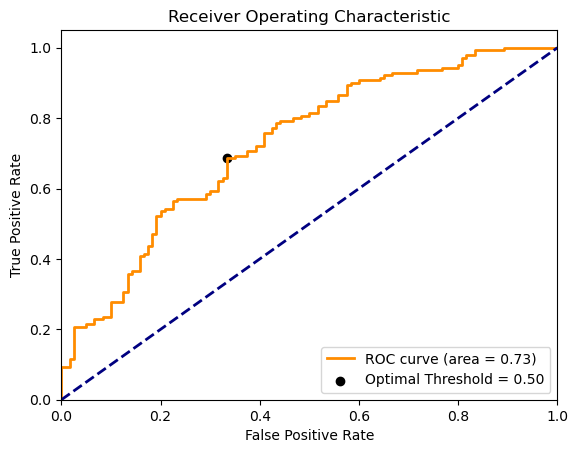

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_proba = catb.predict_proba(X_test)[::,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='black', label='Optimal Threshold = %0.2f' % optimal_threshold)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()